<a href="https://colab.research.google.com/github/JohnnyAliyev/JohnnyAliyev-github.io/blob/main/29_Segmenting_Shoppers_with_K_Means_Uncovering_Customer_Clusters_in_FMCG_Purchases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 <a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#284b50; overflow:hidden"><b>Segmenting Shoppers with K-Means: Uncovering Customer Clusters in FMCG Purchases</b></div>



# *Project Overview*

- According to the data author, this dataset captures the purchasing behavior of 2,000 individuals from a particular region during visits to a physical FMCG store. The data was collected through loyalty cards used at checkout. It has been fully preprocessed, with no missing values. To safeguard customer privacy, the data has been anonymized, and the dataset size has been restricted


| **Variable**        | **Data Type**   | **Range**      | **Description**                                                                 |
|---------------------|-----------------|----------------|---------------------------------------------------------------------------------|
| **ID**              | Numerical       | Integer        | Represents a unique identifier assigned to each customer.                       |
| **Sex**             | Categorical     | {0,1}          | The gender of the customer. 0: male, 1: female                                  |
| **Marital Status**  | Categorical     | {0,1}          | The marital status of the customer. 0: single, 1: non-single (divorced/separated/married/widowed) |
| **Age**             | Numerical       | Integer        | The customer’s age in years (calculated by subtracting the year of birth from the current year). Min: 18, Max: 76 |
| **Education**       | Categorical     | {0,1,2,3}      | The customer’s education level. 0: other/unknown, 1: high school, 2: university, 3: graduate school |
| **Income**          | Numerical       | Real           | The customer’s self-reported annual income in USD. Min: 35832, Max: 309364      |
| **Occupation**      | Categorical     | {0,1,2}        | The customer’s job category. 0: unemployed/unskilled, 1: skilled employee/official, 2: management/self-employed/highly skilled worker/officer |
| **Settlement Size** | Categorical     | {0,1,2}        | The size of the city where the customer resides. 0: small city, 1: mid-sized city, 2: large city |




 - The goal of this analysis is to identify the optimal clusters of customers based on provided data.

#  *1.Import Libraries*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#  *2.Import Dataset*

In [ ]:
df=pd.read_csv('Downloads/archive-2/segmentation data.csv')
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


# *3. Data Analysis and Visualization*

In [ ]:
df.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [ ]:
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [ ]:
# there is no null cell, it is good for further works

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


<Axes: >

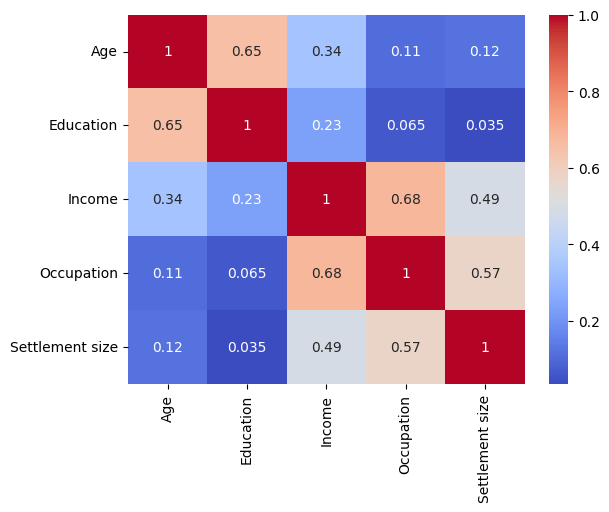

In [ ]:
corr_matrix = df.drop(['ID', 'Sex','Marital status'], axis=1).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


In [ ]:
print(df.columns)

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')


In [ ]:
df.columns = df.columns.str.strip()

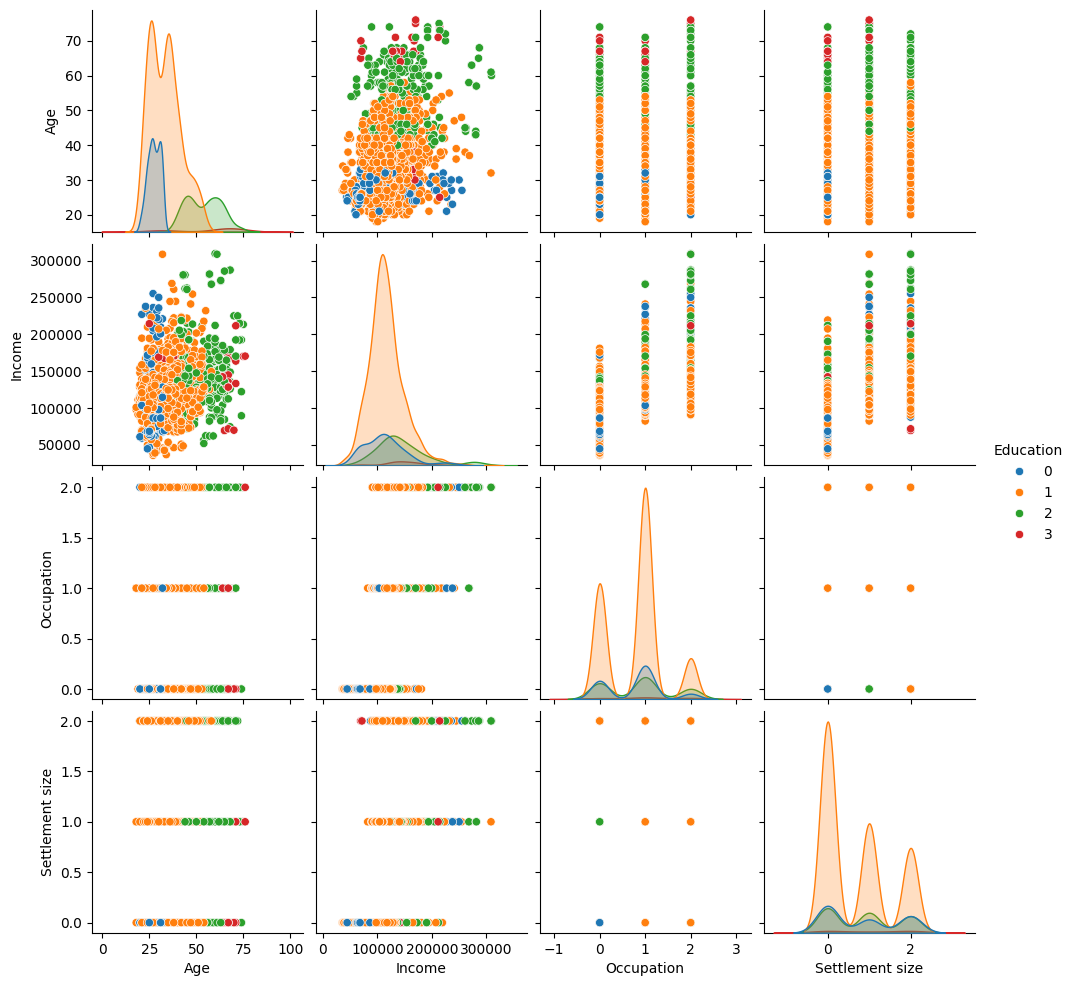

In [ ]:
if 'Education' in df.columns:
    df['Education'] = df['Education'].astype('category')


sns.pairplot(df.drop(['ID', 'Sex','Marital status',], axis=1),hue='Education')
plt.show()

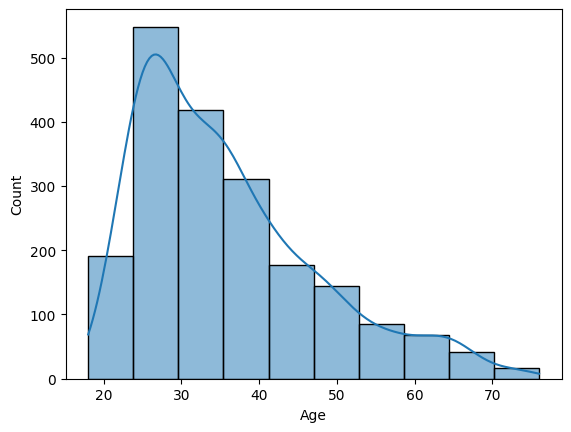

In [ ]:
sns.histplot(df['Age'],kde=True,bins=10)
plt.show()

# *4.Model Training*

## a) K-means

In [ ]:
# keeping only important column

In [ ]:
data = df.drop(['ID'],axis=1)
data.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


In [ ]:
from sklearn.cluster import KMeans

kmeans2 = KMeans(n_clusters=5, n_init='auto', random_state=42)
kmeans2.fit(data)

KMeans(n_clusters=5, random_state=42)

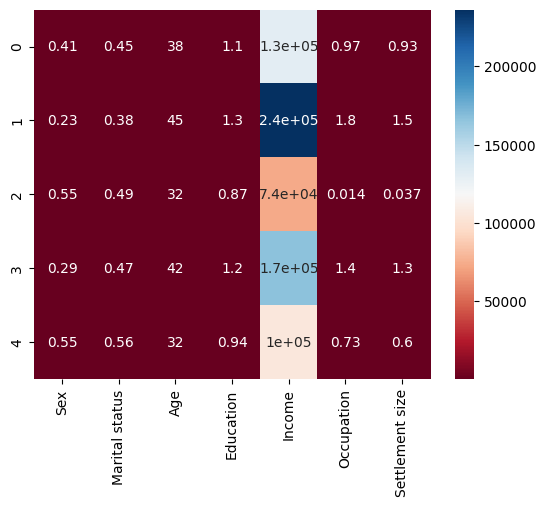

In [ ]:
import seaborn as sns

cluster_centers2 = pd.DataFrame(kmeans2.cluster_centers_, columns=data.columns)
sns.heatmap(cluster_centers2, cmap='RdBu', annot=True);

In [ ]:
df['Cluster'] = kmeans2.fit_predict(df)

df.sort_values('Cluster',ascending=False)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
756,100000757,0,0,74,2,89502,0,0,4
843,100000844,0,0,50,1,114853,1,0,4
817,100000818,1,1,24,1,101157,1,1,4
819,100000820,0,1,26,1,96716,1,2,4
820,100000821,0,1,27,1,95171,1,0,4
...,...,...,...,...,...,...,...,...,...
1077,100001078,0,0,59,2,136123,1,1,0
1079,100001080,1,1,60,2,128271,1,1,0
1081,100001082,0,0,63,2,122267,1,2,0
1084,100001085,0,1,55,2,145781,1,2,0


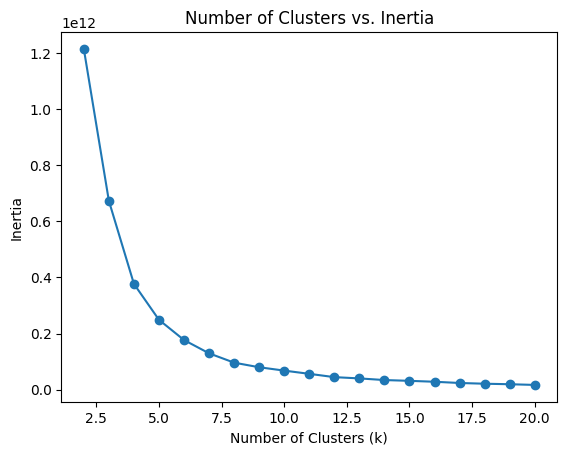

In [ ]:
# Inertia Plot
# create an empty list to hold many inertia values
inertia_values = []

# create 2 - 20 clusters, and add the intertia scores to the list
for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(data)
    inertia_values.append(kmeans.inertia_)


# plot the inertia values
import matplotlib.pyplot as plt

# turn the list into a series for plotting
inertia_series = pd.Series(inertia_values, index=range(2, 21))

# plot the data
inertia_series.plot(marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Number of Clusters vs. Inertia");

In [ ]:
# 4 looks good

In [ ]:
# adjust model

kmeans4 = KMeans(n_clusters=4, n_init='auto', random_state=42)
kmeans4.fit(data)
df['Cluster'] = kmeans4.fit_predict(df)

df.sort_values('Cluster',ascending=False)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
1000,100001001,1,1,63,2,134853,1,1,3
1185,100001186,0,0,61,2,145227,0,1,3
1199,100001200,0,0,35,1,182822,2,2,3
1196,100001197,0,0,53,1,177179,1,1,3
1195,100001196,0,0,30,1,154003,0,1,3
...,...,...,...,...,...,...,...,...,...
1353,100001354,1,1,52,2,123194,1,0,0
1354,100001355,1,1,19,1,99519,1,1,0
1355,100001356,1,1,23,1,112853,1,0,0
1356,100001357,1,0,42,1,110509,1,0,0


## Tune the K-Means Model

In [ ]:
# 1. Remove the ”Sex	Marital status	” column
data_subset = data[['Age','Education','Income','Occupation','Settlement size']]
data_subset.head()

,Age,Education,Income,Occupation,Settlement size
0,67,2,124670,1,2
1,22,1,150773,1,2
2,49,1,89210,0,0
3,45,1,171565,1,1
4,53,1,149031,1,1


In [ ]:
# 2. Standardize the  columns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_subset[['Age', 'Income']] = scaler.fit_transform(df[['Age', 'Income']])
data_subset.head()

,Age,Education,Income,Occupation,Settlement size
0,2.653614,2,0.097524,1,2
1,-1.187132,1,0.782654,1,2
2,1.117316,1,-0.833202,0,0
3,0.775916,1,1.328386,1,1
4,1.458716,1,0.736932,1,1


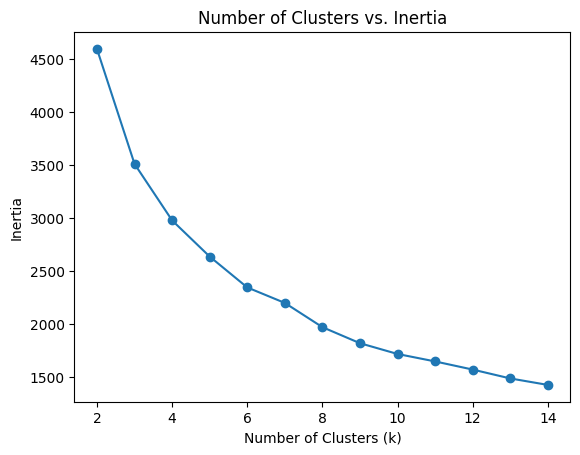

In [ ]:
inertia_values_scaled = []

for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(data_subset)
    inertia_values_scaled.append(kmeans.inertia_)


inertia_series = pd.Series(inertia_values_scaled, index=range(2, 15))

# plot the data
inertia_series.plot(marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Number of Clusters vs. Inertia");

In [ ]:
# 6 looks elbow

In [ ]:
# Fit a K-Means Clustering model on the specific number of clusters at the elbow
kmeans6 = KMeans(n_clusters=6, n_init='auto', random_state=42)
kmeans6.fit(data_subset)

KMeans(n_clusters=6, random_state=42)

<Axes: >

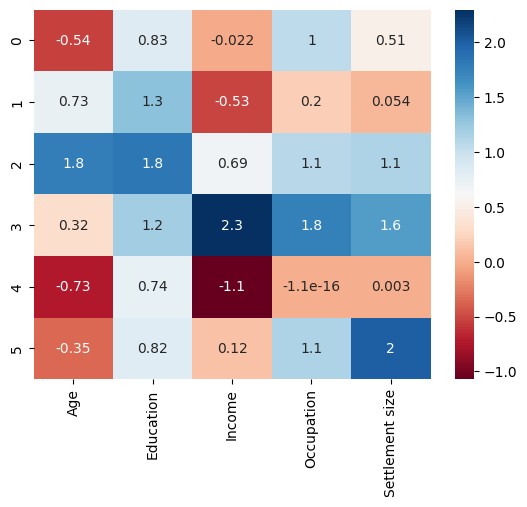

In [ ]:
cluster_centers6 = pd.DataFrame(kmeans6.cluster_centers_, columns=data_subset.columns)
sns.heatmap(cluster_centers6, cmap='RdBu', annot=True)

<Figure size 1000x900 with 0 Axes>

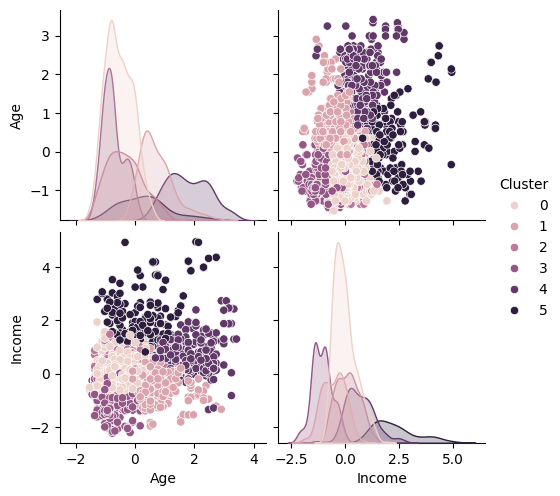

In [ ]:
data_subset['Cluster'] = kmeans6.fit_predict(data_subset)
plt.figure(figsize=(10, 9))
sns.pairplot(data_subset.drop(['Education', 'Occupation','Settlement size'], axis=1),hue='Cluster')
plt.show()

# 5. Predict new customer's cluster

In [ ]:
def predict_new_cst_clstr(c, e, d, g, h):

    test_data = pd.DataFrame({
        'Age': [c],
        'Education': [d],
        'Income': [e],
        'Occupation': [g],
        'Settlement size': [h]
    })

    # Standardize the test data

    test_data_scaled = test_data.copy()
    test_data_scaled[['Age', 'Income']] = scaler.transform(test_data[['Age', 'Income']])

    # Predict
    cluster = kmeans6.predict(test_data_scaled[['Age', 'Education', 'Income', 'Occupation', 'Settlement size']])
    test_data['Cluster'] = cluster
    return test_data

# Example usage
result = predict_new_cst_clstr(c=60, e=25000, d=2, g=1, h=1)
pd.DataFrame(result)

,Age,Education,Income,Occupation,Settlement size,Cluster
0,60,2,25000,1,1,1


In [ ]:
# visualize clustering